# 데이터분석 맛보기
## 전처리가 필요한 이유를 알아봅니다.

<br/>
<br/>

## 회귀 문제
- 연속적인 값을 맞추는 문제


In [11]:
# 1) 테스트용 데이터 만들기 ======================================================
from sklearn.datasets import make_regression
X, y, w = make_regression(
    n_samples=100, n_features=1, bias=100, noise=10, coef=True, random_state=0
)

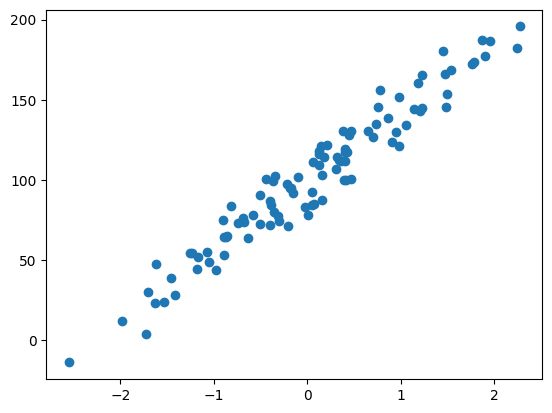

In [12]:
import matplotlib.pyplot as plt

Xf = X.copy()
plt.scatter(x=Xf.flatten(), y=y)

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor 

# 2) 데이터 전처리 =========================================================
# 이 사례에서는 별도의 전처리는 없다. 

# 3) 학습용 데이터 준비 ====================================================
#전체 100개의 데이터에서 학습용 데이터와 검증용 데이터를 무작위로 분리 (기본적으로 학습용 7 : 검증용 3)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=19)

# 4) 모델 생성 및 학습 ======================================================
#회귀분석을 위한 머신러닝 모델 생성 (Stochastic Gradient Regressor)
model = SGDRegressor()

#모델에 학습용 데이터를 가지고 학습시킨다.
model.fit(X_train, y_train)

# 5) 모델 성능 검증 및 평가 =================================================
#모델에 검증용 데이터를 가지고 성능 측정한다.
score = model.score(X_test, y_test)

#테스트로 임의의 값 0.7을 주고 맞춰보라고 한다.
y_hat = model.predict([[0.7]])

print('예측 정확도 : ', (score*100).round(2), ' %')
print('x가 0.7일 때 예측값은 %d' %y_hat)

예측 정확도 :  91.63  %
x가 0.7일 때 예측값은 128


In [14]:
# SGD Regressor가 찾아낸 기울기와 절편값을 알아보자.
print('절편은 : ', model.intercept_, '  기울기는 : ', model.coef_)

절편은 :  [98.43281994]   기울기는 :  [42.27034713]


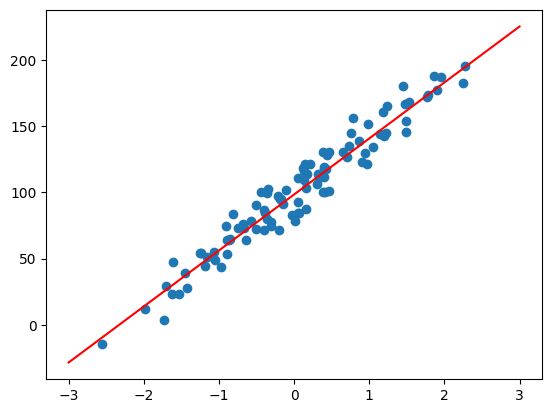

In [15]:
# SGD Regressor가 찾아낸 기울기와 절편으로 데이터 위에 회귀직선을 그려봅시다.
# aX + b = Y의 형태
a = model.coef_
b = model.intercept_

# X가 -3일 때는 -3 * a + b
# X가 3일 때는 3 * a + b
plt.scatter(x=Xf.flatten(), y=y)
plt.plot([-3, 3], [-3*a + b, 3*a + b], 'r')

<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

# 데이터 전처리

## 정의
- 데이터를 분석에 사용할 때 성능이 더 좋게 나오도록 데이터를 수정하거나 형태를 변형하는 작업
- data preprocessing

<img src="https://raw.githubusercontent.com/data-labs/image/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-01-07%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%204.33.49.png?raw=1" width=500  align='left'>  



## 데이터 전처리 종류

- 데이터 클리닝 - 결측치 처리, 틀린값 처리
- 스케일링 - 여러 변수 값의 범위를 동등한 조건으로 맞추는 것: 표준 스케일링, min-max 스케일링
- 이상치 처리 - 이상치 탐지 및 제거
- 데이터 변환 - 로그 변환, 카테고리 인코딩 등

# 데이터 클리닝

##  결측치 처리
- 값이 비어 있는 것을 처리하는 것 (파이썬에서는 빈 값이 nan으로 표시된다: not a number)
- 결측치를 처리하는 방법은 크게 세 가지가 있다
 - 결측치가 포함된 샘플(행)을 버린다
 - 결측치를 적절한 값으로 대체한다
 - 결측치 처리를 다음 분석 단계로 넘긴다. 즉, 결측치를 그대로 둔다
 
##  틀린값 처리
- 틀린값을 처리하는 방법도 결측치를 처리하는 방법과 같이 세가지이다
 - 틀린 값이 포함된 샘플(행)을 버린다
 - 틀린 값을 적절한 값으로 대체한다
 - 틀린값 처리를 다음 분석 단계로 넘긴다. 즉, 틀린값을 그대로 둔다

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [17]:
# matplotlib를 이용하여 다양한 시각화 함수를 제공하는 라이브러리 seaborn
import seaborn as sns

## 실습 데이터 준비
- 키와 몸무게 데이터 생성
- 평균 170cm, 65kg, 표준편차 4cm, 5kg

In [18]:
# rand() : 0부터 1사이 균일분포
# randn() : 평균0, 표준편차 1의 정규분포
n_samples = 1000
height = 4*np.random.randn(n_samples).round(2) + 170
weight = 5*np.random.randn(n_samples).round(2) + 65
df_raw = pd.DataFrame({"height": height, "weight": weight})
df_raw[:5]

,height,weight
0,169.52,71.10
1,170.60,66.00
2,164.92,62.80
3,165.12,71.45
4,168.84,65.05


In [19]:
# 사본 사용 (원본 백업)
df = df_raw.copy()

<ipython-input-53-fe6eb04f0737>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.height.values)


<Axes: ylabel='Density'>

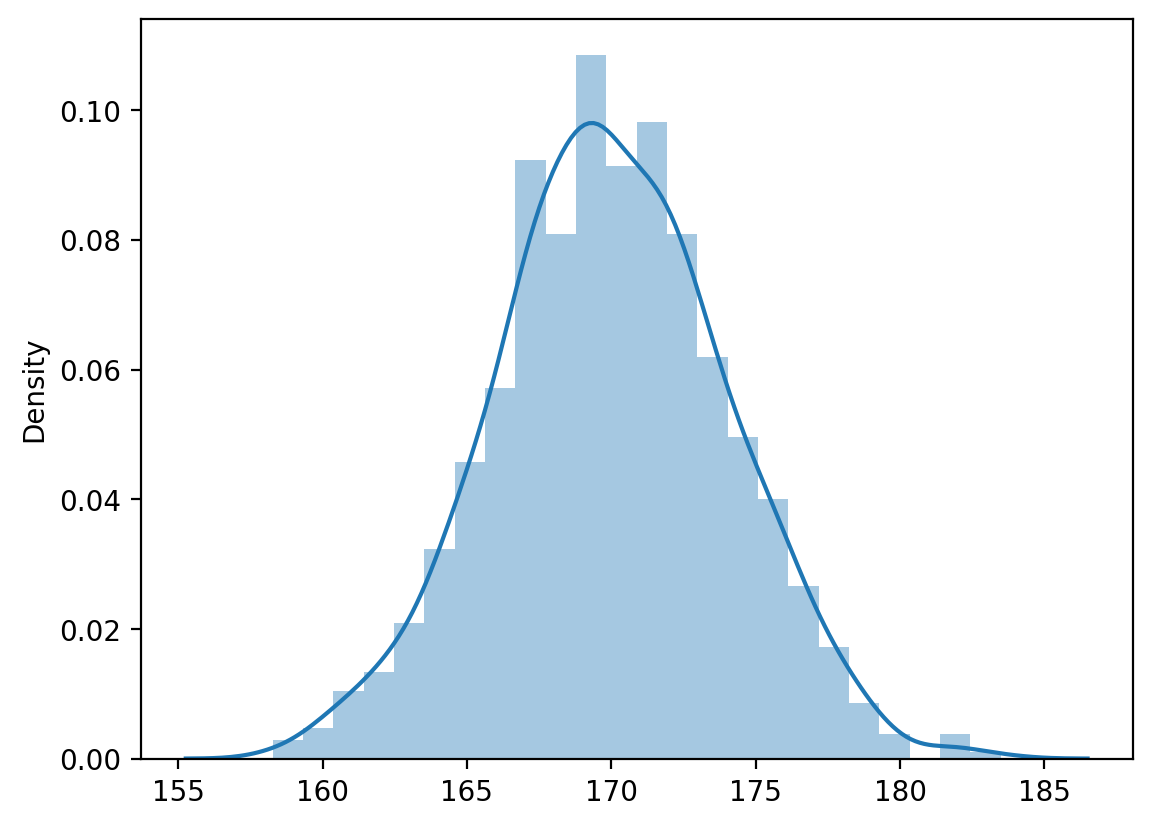

In [53]:
# 샘플의 확률 분포 근사 그래프 보기
sns.distplot(df.height.values)

## 결측치 처리 실습

- 결측치 확인은 np.isnull() 사용
- 결측치 치환은 np.fillna() 사용

In [21]:
df[:5]

,height,weight
0,169.52,71.10
1,170.60,66.00
2,164.92,62.80
3,165.12,71.45
4,168.84,65.05


In [22]:
# 임의의 값 하나를 결측치로 변경
df['weight'][2] = np.nan
df[:5]

,height,weight
0,169.52,71.10
1,170.60,66.00
2,164.92,NaN
3,165.12,71.45
4,168.84,65.05


### 결측치 개수 파악
- isnull().sum()

In [23]:
# 컬럼별 결측치 갯수 보기
df.isnull().sum()

height    0
weight    1
dtype: int64

### 결측치 데이터 삭제
- dropna

In [24]:
# 결측치가 있는 행(샘플) 삭제하기
df2 = df.dropna()
print(df2.shape)
df2[:5]

(999, 2)


,height,weight
0,169.52,71.10
1,170.60,66.00
3,165.12,71.45
4,168.84,65.05
5,172.00,63.35


### 결측치 채워넣기 
- fillna

In [25]:
# 결측치를 다른 값으로 대체하기 (아래는 몸무게 컬럼의 평균치로 대체한 예)
df3 = df.fillna(df['weight'].mean())
print(df3.shape)
print(df['weight'].mean())
df3[:5]

(1000, 2)
65.13148148148149


,height,weight
0,169.52,71.100000
1,170.60,66.000000
2,164.92,65.131481
3,165.12,71.450000
4,168.84,65.050000


In [26]:
# 결측치를 0으로 대체하는 경우
df.fillna(0)[:5]

,height,weight
0,169.52,71.10
1,170.60,66.00
2,164.92,0.00
3,165.12,71.45
4,168.84,65.05


In [27]:
# 결측치를 직전 정상 값으로 대체하는 경우 (ffill or pad)
# 결측치를 다음 정상 값으로 대체하는 경우 (bfill or backfill)
df.fillna(method="ffill")[:5]

,height,weight
0,169.52,71.10
1,170.60,66.00
2,164.92,66.00
3,165.12,71.45
4,168.84,65.05


### 실습해보기 !!!


# 스케일링

### 이진분류를 위한 결정경계(decision boundary)의 문제

- 하나의 변수만 사용하는 경우 선형분류 결정 경계: $x_{1} > b$  
- 두 개의 변수를 사용하는 경우 선형분류 결정 경계: $a_{1}x_{1}+a_{2}x_{2}+b >0$  
     > $x_{2} > -$$a_{1}\over a_{2}$ $x_{1} - $$b\over{a_{2}}$


<img src="https://raw.githubusercontent.com/data-labs/image/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-01-09%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%205.19.06.png?raw=1" width=550 align='center'>

- 사례) 소득세율와 보유부동산의 산포. 양 축의 단위가 다른데 값을 그대로 쓰면 기울기가 거의 0에 가깝게 나올 것 
- 여러 변수 값의 범위가 서로 다른 경우 데이터 분석에서 동일한 비중으로 반영하기 위해서는 동일한 범위를 갖도록 변환해야 한다 (예: 과목 성적 100점 만점으로 환산)
- 표준 스케일링을 가장 많이 사용한다 (평균이 0, 표준편차가 1이 되도록 변환)
- 값의 최소치와 최대치가 정해진 경우는 min-max 스케링일도 자주 사용된다 (feature_range : 최소값과 최대값을 지정 가능)
- min-max 스케일링은 극단값이 들어올 경우 통계치가 많이 흔들린다. 이럴 가능성이 있는 데이터의 경우는 쓰지 않는 것이 좋다. (표준 스케일링은 분산으로 나누기 때문에 극단값이 있어도 그만큼 영향이 감소됨)
<br/><br/>


### 표준 스케일링

<img src="https://raw.githubusercontent.com/data-labs/image/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-01-05%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%208.52.14.png?raw=1" width=140  align='left'>
<br/>

In [28]:
# 키, 몸무게 데이터를 각각 표준 스케일링한 후 컬럼에 추가
df = df_raw.copy() # 백업 데이터 사용 (결측치 없는)
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
df[['h_sc','w_sc']]=scale.fit_transform(df[['height','weight']])
df[:5]

,height,weight,h_sc,w_sc
0,169.52,71.10,-0.113588,1.225510
1,170.60,66.00,0.156384,0.178741
2,164.92,62.80,-1.263470,-0.478055
3,165.12,71.45,-1.213475,1.297347
4,168.84,65.05,-0.283571,-0.016245


In [29]:
# 평균, 표준편차
scale.mean_, scale.scale_

(array([169.9744 ,  65.12915]), array([4.00041206, 4.87213534]))

### 데이터 분포 보기

<Axes: ylabel='Density'>

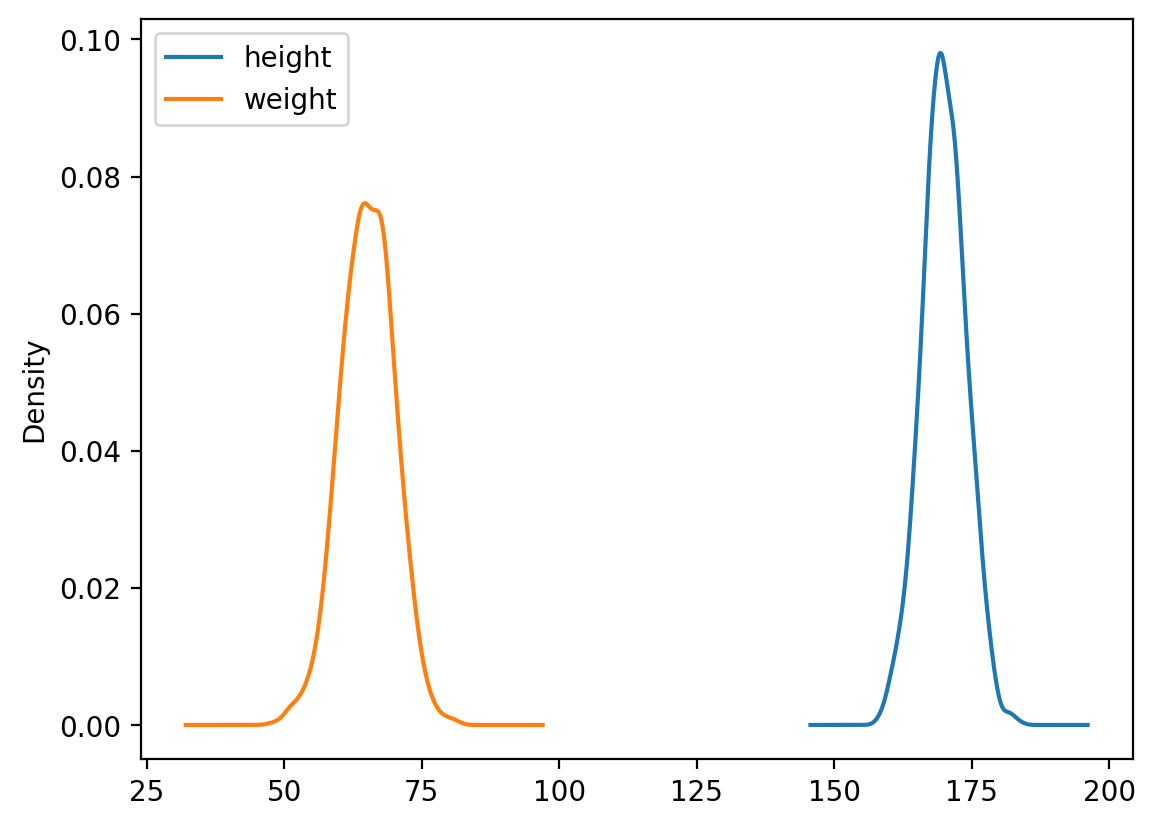

In [30]:
# kde 참고 : https://challenge.tistory.com/28 
# 원래 키, 몸무게의 데이터의 확률 분포 보기 (kernel density estimate 함수 사용)
df[["height","weight"]].plot.kde()

<Axes: ylabel='Density'>

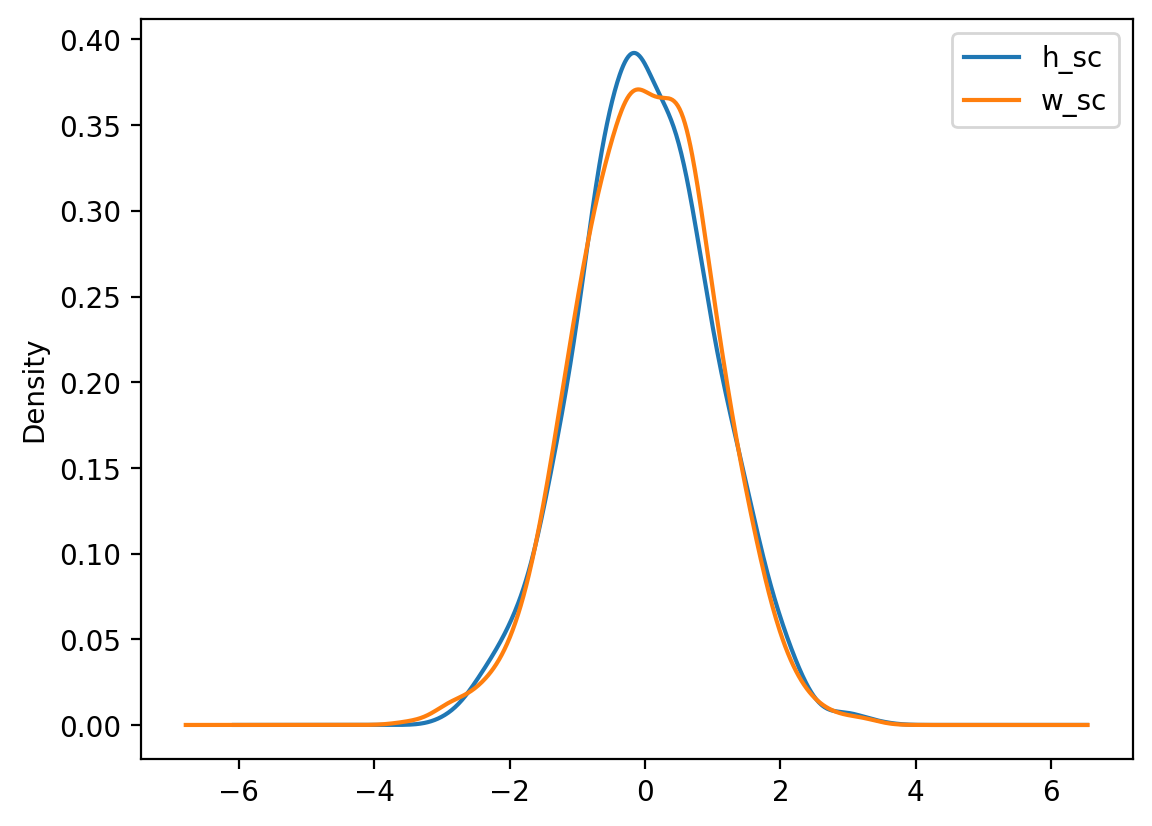

In [31]:
# 표준 스케일링된 데이터의 확률 분포 보기 - 정규분포로 생성했다
df[["h_sc","w_sc"]].plot.kde()

### 실습해보기 !!!

## Min-Max 스케일링
- 데이터의 최소값이 0, 최대값이 1이 되도록 조정

In [32]:
# BACKUP ########################################
df_origin = df.copy()

In [33]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
df[['h_mima','w_mima']]=minmax.fit_transform(df[['height','weight']])
df[:5]

,height,weight,h_sc,w_sc,h_mima,w_mima
0,169.52,71.10,-0.113588,1.225510,0.446032,0.702619
1,170.60,66.00,0.156384,0.178741,0.488889,0.545455
2,164.92,62.80,-1.263470,-0.478055,0.263492,0.446841
3,165.12,71.45,-1.213475,1.297347,0.271429,0.713405
4,168.84,65.05,-0.283571,-0.016245,0.419048,0.516179


<Axes: ylabel='Density'>

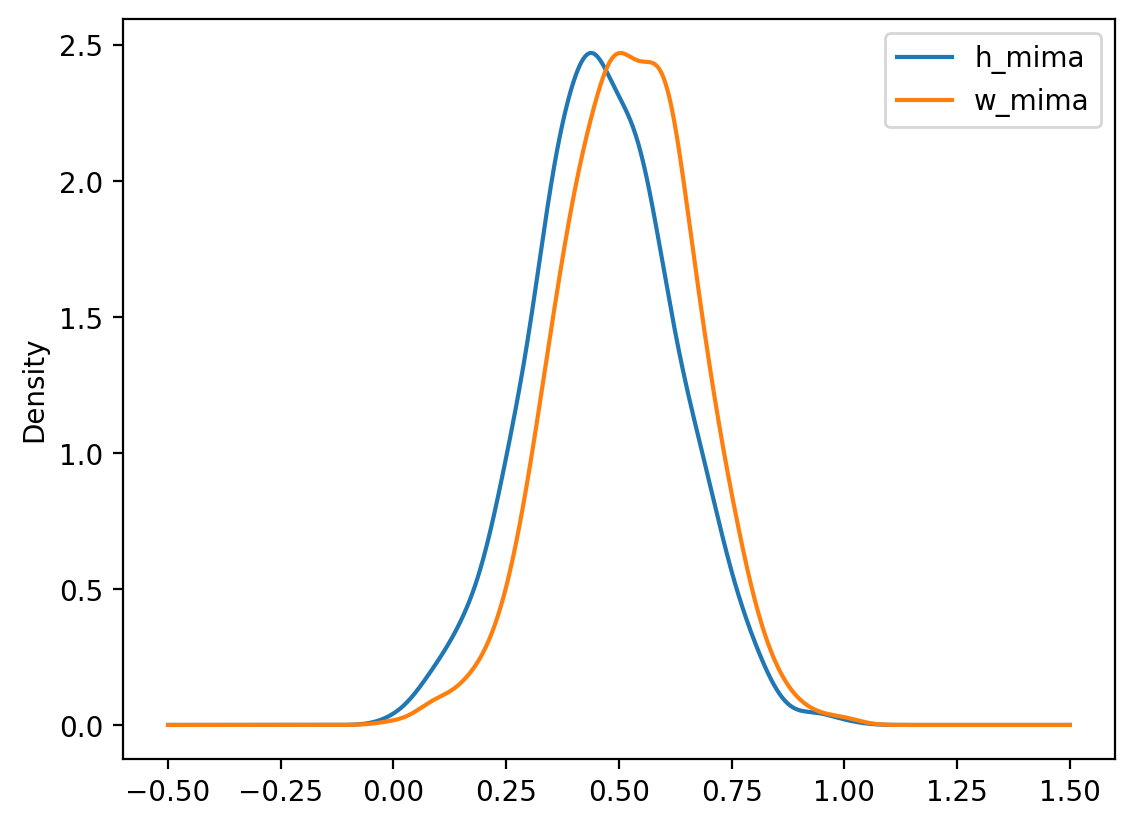

In [34]:
# min-max 스케일링 된 데이터의 확률 분포
df[["h_mima","w_mima"]].plot.kde()

- 위의 결과를 보면 표준 스케일링과 min-max 스케일링이 별 차이가 없다
- 그러나 이상치가 있을 때는 두 스케일링 결과 값의 변화 정도가 크게 다르다

In [35]:
# 이상치가 포함된 키 데이터 생성: height_1
# 첫번째 샘플의 키 값을 임의로 2m로 변경 (200)
height_1 = height.copy()
height_1[0] = 200

In [36]:
df["height_1"] = height_1
df[:3]

,height,weight,h_sc,w_sc,h_mima,w_mima,height_1
0,169.52,71.1,-0.113588,1.225510,0.446032,0.702619,200.00
1,170.60,66.0,0.156384,0.178741,0.488889,0.545455,170.60
2,164.92,62.8,-1.263470,-0.478055,0.263492,0.446841,164.92


In [37]:
# 이상치가 포함된 데이터(컬럼)에 표준 스케일링을 적용
df[['h_sc','w_sc']]=scale.fit_transform(df[['height_1','weight']])
df[:3]

,height,weight,h_sc,w_sc,h_mima,w_mima,height_1
0,169.52,71.1,7.295579,1.225510,0.446032,0.702619,200.00
1,170.60,66.0,0.144748,0.178741,0.488889,0.545455,170.60
2,164.92,62.8,-1.236773,-0.478055,0.263492,0.446841,164.92


<Axes: ylabel='Density'>

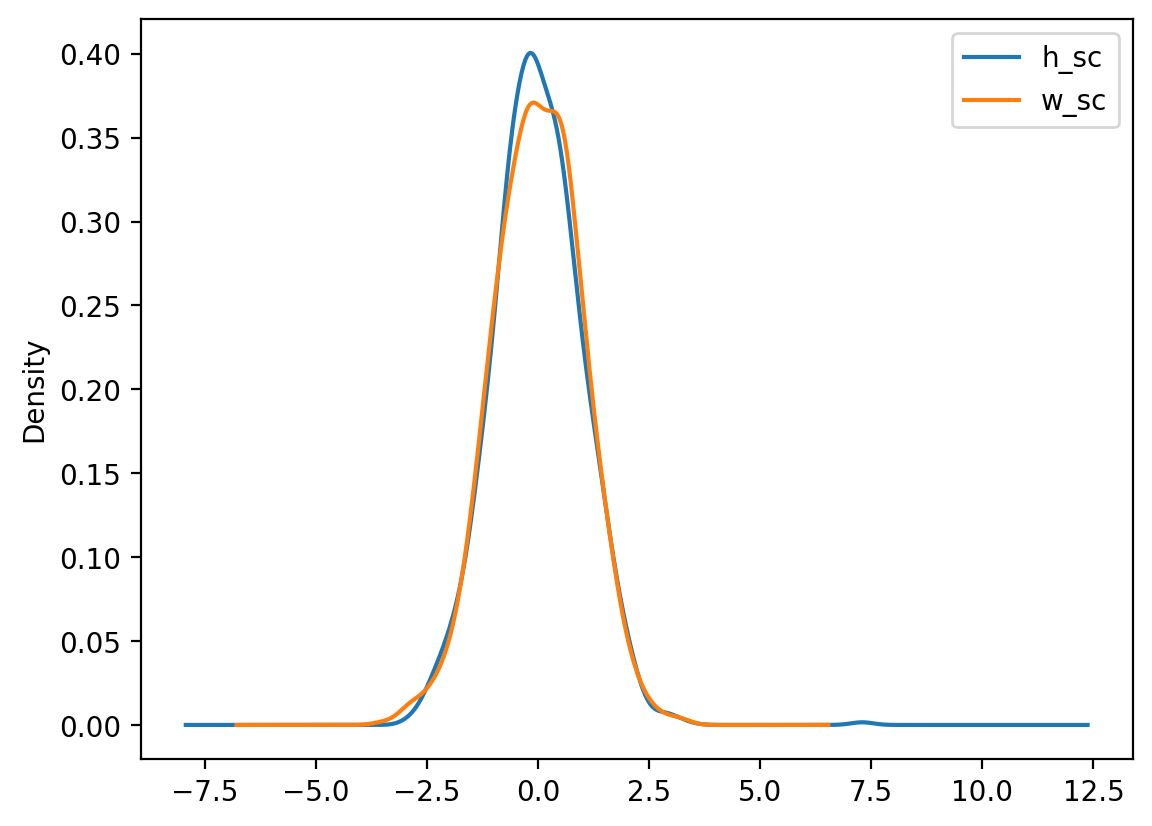

In [38]:
# 이상치가 있더라도 "표준 스케일링" 데이터의 다른 값의 분포는 거의 변화가 없다
# 한 샘플 추가로 인해 전체 평균과 표준편차가 거의 변하지 않으므로
df[['h_sc','w_sc']].plot.kde()

In [39]:
# 이상치가 있는 데이터에 nim-max 스케일링을 적용
df[['h_mima','w_mima']]=minmax.fit_transform(df[['height_1','weight']])
df[:3]

,height,weight,h_sc,w_sc,h_mima,w_mima,height_1
0,169.52,71.1,7.295579,1.225510,1.000000,0.702619,200.00
1,170.60,66.0,0.144748,0.178741,0.295302,0.545455,170.60
2,164.92,62.8,-1.236773,-0.478055,0.159156,0.446841,164.92


<Axes: ylabel='Density'>

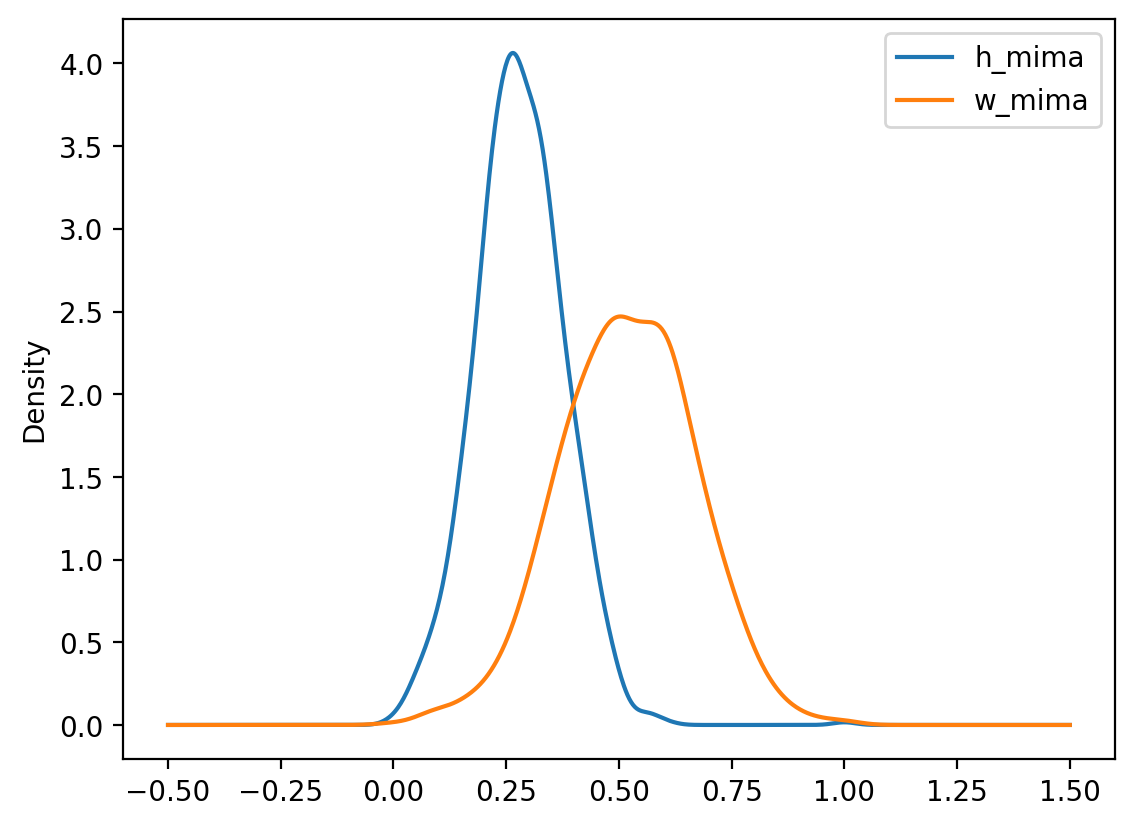

In [40]:
# 이상치 하나 때문에 min-max 스케일링 데이터의 다른 값들이 크게 달라진다
# 크거나 작은 단 한개의 샘플 추가로도 다른 샘플들의 값이 크게 달라질 수 있다
# 여기서는 200인 키의 값이 1로 환산되었다

df[['h_mima','w_mima']].plot.kde()

### 실습해보기 !!!

# 이상치 처리
- 이상치 처리의 목적은 두가지 이다
 - 1) 이상치를 제거하여 데이터 분석의 정확도를 높이려는 경우
 - 2) 이상치를 찾는 것 자체가 목적인 경우 (outlier detection)  
 
- 아래는 모두 같은 상관계수를 같는 데이터 셋이다

<img src="https://raw.githubusercontent.com/data-labs/image/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-01-03%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%201.47.02.png?raw=1" width=400 align='left'>

## 이상치 탐지
 - boxplot()을 보면 이상치 존재를 파악하기 쉽다
 - 표준 스케일링 한 후 값이 큰 것들 (예 6 이상)을 찾는 방법이 일반적이다

<Axes: >

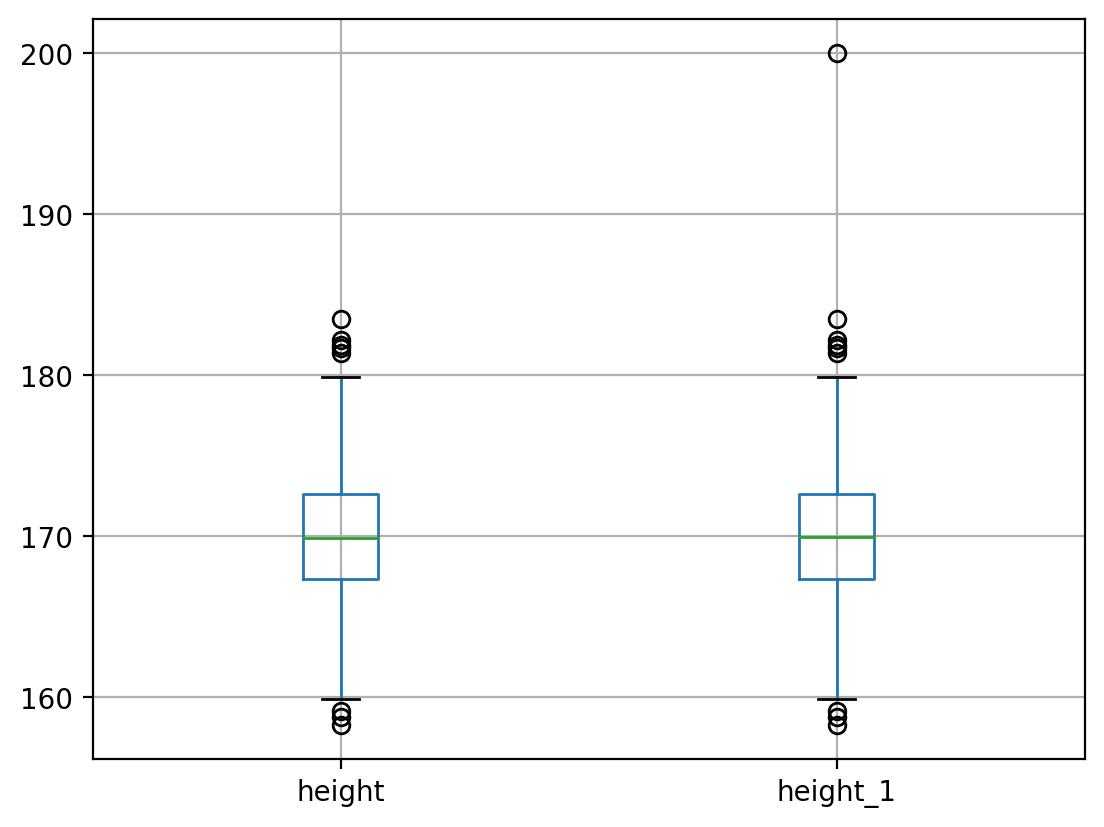

In [41]:
# 이상치가 없는 경우와 있는 경우의 박스 플롯
df[["height", "height_1"]].boxplot()

<Axes: >

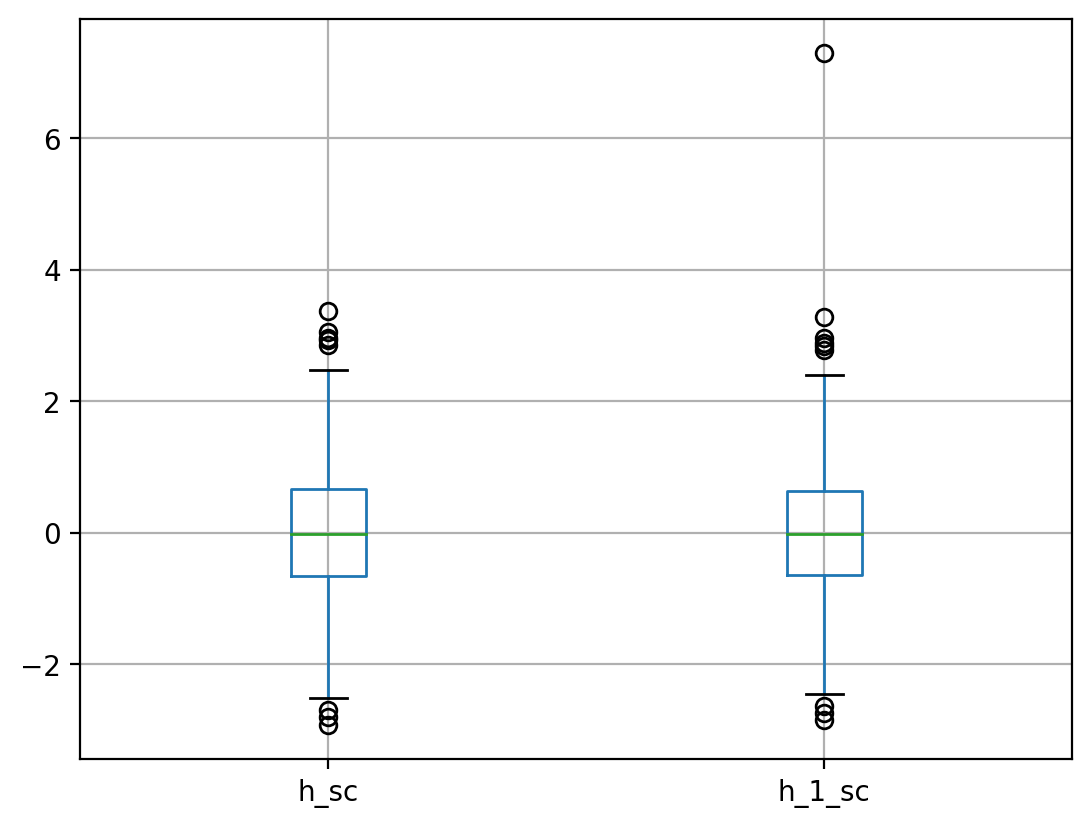

In [42]:
# 스케일링된 데이터를 비교하기 
# 키 2m인 사람은 7 표준편차 밖에 존재: 4cm x 7 = 28cm => 즉 평균보다 28cm 더 크다.
df['h_sc'] = scale.fit_transform(df[['height']])
df['h_1_sc']=scale.fit_transform(df[['height_1']])
df[["h_sc", "h_1_sc"]].boxplot()

#### 참고 : 표준편차와 이상치

- 위 사례에서 4시그마이면 99.99% 밖에 존재하는 데이터라는 의미임.

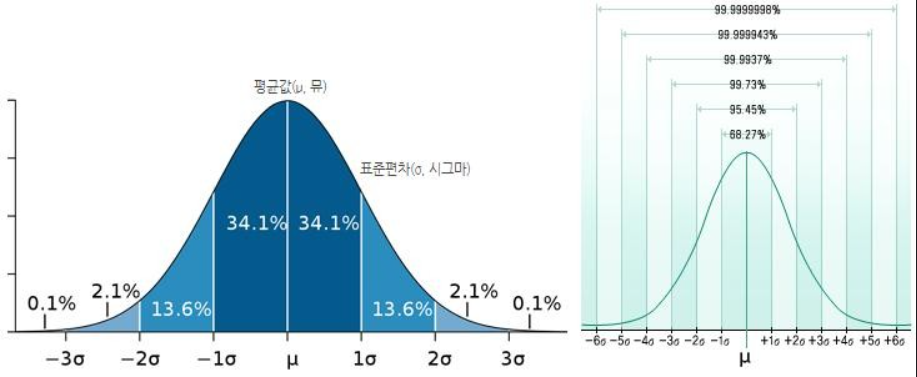

### 실습해보기 !!!

# 데이터 변환
## 로그 변환

[지수함수와 로그함수](https://en.wikipedia.org/wiki/Logarithmic_scale)

[로그스케일이 필요한 경우](https://blog.naver.com/PostView.nhn?blogId=wei-jung&logNo=221472738196)

- 데이터 분석에서는 입출력 관계가 선형적일 때 가장 잘 예측할 수 있다 (선형적일수록 예측이 잘 된다)
- 아래 그림에서 2010년 이후는 거의 값을 보는 것이 의미가 없을 정도로 가파르게 증가한다.
- 로그를 취하면 기하급수적으로 증가하는 관계는 선형적으로 바뀌고, 선형적 관계는 일정한 값으로 수렴하는 형태의 로그스케일로 변환된다.

<img src="https://imageio.forbes.com/blogs-images/naomirobbins/files/2012/01/linear_log.jpg?format=jpg&width=474" width=400 align='left'>




- 로그를 취해야 입출력 관계에서 선형적인 변화(효과)를 표현하는 경우들이 많다.
- 예: 돈, 생물학적 자극과 반응 관계 (청각, 미각, 후각, 압력 등)


- [수입에 따른 행복도]

<img src="https://i.imgur.com/K4Elm2B.png" alt="Image description" width=400 align='left'><br><br><br><br><br><br><br><br><br>

- [인터넷 호스트의 증가] 

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/c6/Internet_host_count_1988-2012_log_scale.png/800px-Internet_host_count_1988-2012_log_scale.png?20120518130410" width=400 align='left'>


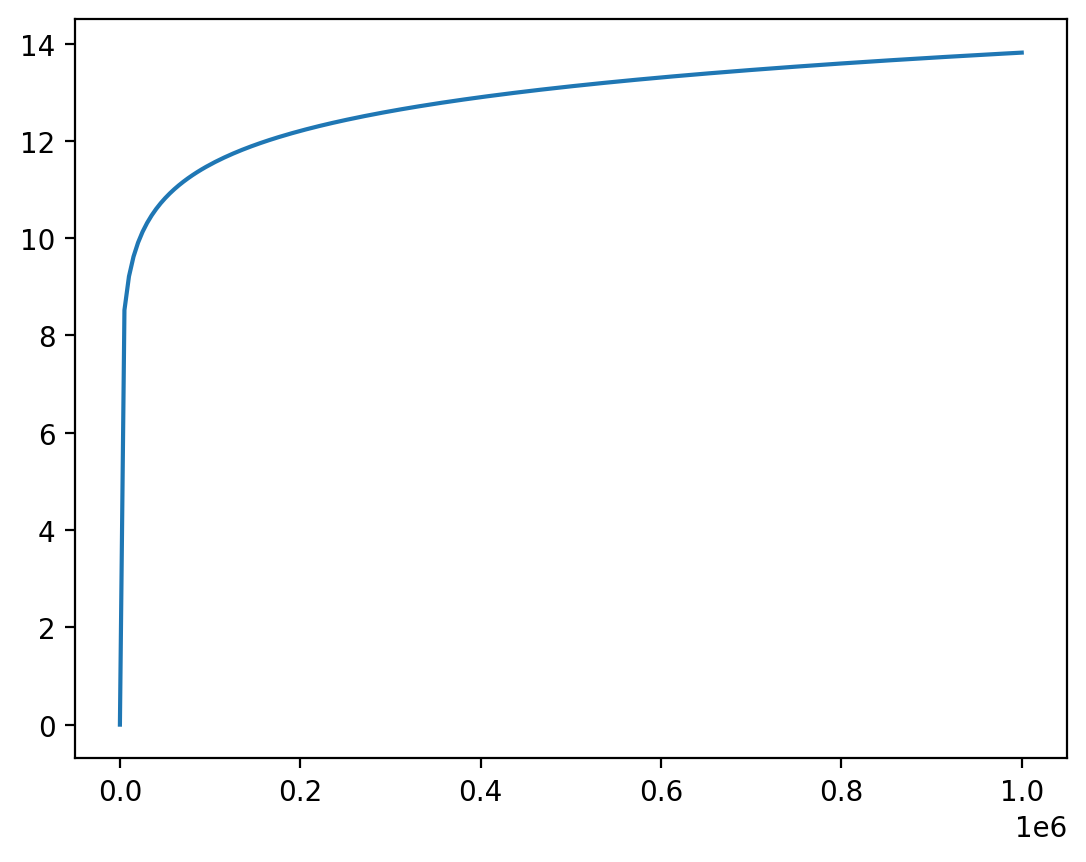

In [43]:
# 돈의 수입과 만족도의 관계는 대체로 로그 함수를 따른다 (생물학적 반응)
# (해석) 로그 함수의 기울기는 1/x 이다. 즉 만족도 증가는 현재 가진 돈의 크기에 반비례한다
# 1부터 1000000까지 200개의 데이터 생성
x = np.linspace(1,1000000, 200)
# x를 진수로 하고 밑수를 e로 하는 로그함수로 변환 ==> e의 y제곱은 X
y = np.log(x)
plt.plot(x,y)

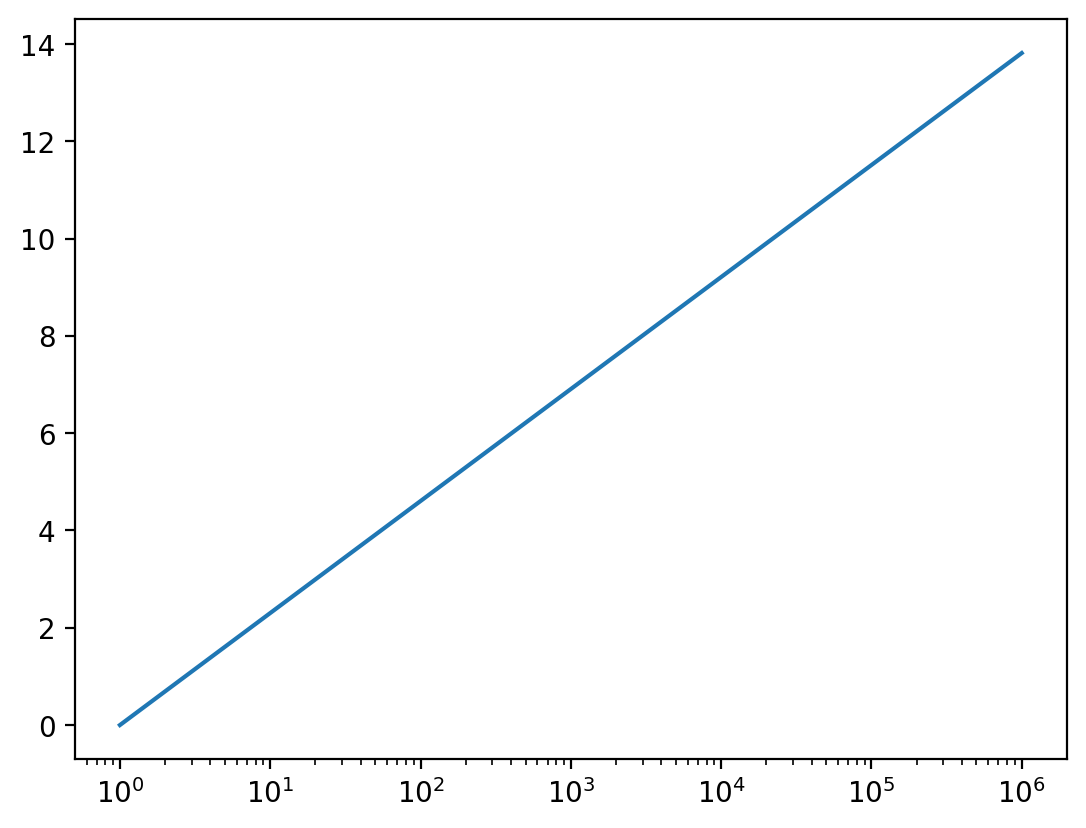

In [44]:
# x 축을 로그 스케일로 그리면 (로그를 취하면) 입출력 관계가 선형적이 된다
plt.xscale('log')
plt.plot(x,y)

### 그 외 로그 스케일을 적용해야 하는 경우

#### 데이터가 일정 범위 내 존재하지 않고 산포가 불특정하게 퍼진 경우
- 값의 분포가 좀더 균등해지면서 모델이 데이터의 분산, 차이를 파악하기 용이하게 만들어줌

#### 한 변수의 값이 1 - 10 사이이고 다른 변수의 값은 만 - 백만 사이인 경우
- 선형회귀 분석 모델에 따라 알고리즘이 다른데 일반 경사하강법을 사용하는 경우 값이 큰 변수가 더 중요하게 취급되어 성능이 떨어짐. 이 경우 값이 큰 변수를 로그 스케일로 변환하면 성능 향상됨.

#### 값이 한쪽으로 치우쳐 로그스케일을 적용하면 정규분포로 변환될 때
- 모델이 데이터의 중심경향성을 더 잘 파악할 수 있게 도와줌

<img src="https://raw.githubusercontent.com/data-labs/image/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-01-03%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%201.49.30.png?raw=1" width=400 align='left'>

## 카테고리 인코딩

- 연속형 숫자 데이터를 카테고리형(범주형)으로 바꾸는 것
- (예) 시험점수, 등수 차이만으로는 학생의 실력 차이를 파악하기 어렵다
 - 3점 차이
 - 3등 차이
 - 3등급 차이 (등급 차이는 실력차이를 선형적으로 표현한다)
 - 학생들의 점수별 분포가 정규분포를 따른다고 할 때 등간격 구분으로 등급을 매기게 된다.
 - 이 때, 한 등급을 올리려면, 학생 수가 많은 등급일 수록 많은 등수를 올려야 한다. 학생수가 많은 등급 내에서는 등수가 많이 올라봐야 점수차는 거의 없는 것.

- 입력 값의 변화가 선형적(linear)인 효과를 나타낼 때 예측에 도움이 된다
- 내신성적 9등급제는 정규분포를 0.5 시그마 간격으로 (등간격으로) 나눈 것 (총 4.5 시그마 범위)


<img src="https://raw.githubusercontent.com/data-labs/image/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-01-03%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%201.48.55.png?raw=1" width=400 align='left'>

### 키의 등급 나누기

In [45]:
# 키를 세 등급으로 나누는 방법 (표준편차를 기준으로)
df.loc[df['height'] >= 174, 'tall'] = 'large'
df.loc[(df['height'] < 174)&(df['height'] >= 166), 'tall'] = 'standard'
df.loc[df['height'] < 166, 'tall'] = 'small'
df

,height,weight,h_sc,w_sc,h_mima,w_mima,height_1,h_1_sc,tall
0,169.52,71.10,-0.113588,1.225510,1.000000,0.702619,200.00,7.295579,standard
1,170.60,66.00,0.156384,0.178741,0.295302,0.545455,170.60,0.144748,standard
2,164.92,62.80,-1.263470,-0.478055,0.159156,0.446841,164.92,-1.236773,small
3,165.12,71.45,-1.213475,1.297347,0.163950,0.713405,165.12,-1.188127,small
4,168.84,65.05,-0.283571,-0.016245,0.253116,0.516179,168.84,-0.283329,standard
...,...,...,...,...,...,...,...,...,...
995,173.20,65.65,0.806317,0.106904,0.357622,0.534669,173.20,0.777135,standard
996,170.44,70.95,0.116388,1.194723,0.291467,0.697997,170.44,0.105832,standard
997,166.96,56.65,-0.753522,-1.740335,0.208054,0.257319,166.96,-0.740593,standard
998,168.12,60.15,-0.463552,-1.021965,0.235858,0.365177,168.12,-0.458451,standard


In [46]:
# 카테고리 데이터의 구성비
df['tall'].value_counts()

standard    688
large       161
small       151
Name: tall, dtype: int64

In [47]:
# 구성 비율(%)
df['tall'].value_counts()*100/len(df)

standard    68.8
large       16.1
small       15.1
Name: tall, dtype: float64

### 원 핫 인코딩
- 카테고리 변수는 일반적으로 원핫(one-hot) 인코딩으로 표현해야 계산에 사용하기 쉽다
 - 데이터 분석에서는 모든 카테고리 데이터('large', 'standard' 등)를 숫자로 바뀌어야 한다
- pd.get_dummies() 사용

In [48]:
# 카테고리 변수의 원핫 인코딩 (데이터프레임을 만든다)
df_tall = pd.get_dummies(df['tall'])
df_tall[:5]

,large,small,standard
0,0,0,1
1,0,0,1
2,0,1,0
3,0,1,0
4,0,0,1


In [49]:
# 원핫 인코딩된 데이터프레임 합치기 (가로 방향)
df_all = pd.concat((df, df_tall), axis=1)
df_all[:5]

,height,weight,h_sc,w_sc,h_mima,w_mima,height_1,h_1_sc,tall,large,small,standard
0,169.52,71.10,-0.113588,1.225510,1.000000,0.702619,200.00,7.295579,standard,0,0,1
1,170.60,66.00,0.156384,0.178741,0.295302,0.545455,170.60,0.144748,standard,0,0,1
2,164.92,62.80,-1.263470,-0.478055,0.159156,0.446841,164.92,-1.236773,small,0,1,0
3,165.12,71.45,-1.213475,1.297347,0.163950,0.713405,165.12,-1.188127,small,0,1,0
4,168.84,65.05,-0.283571,-0.016245,0.253116,0.516179,168.84,-0.283329,standard,0,0,1


### 실습해보기 !!!